In [6]:
!pip install palmerpenguins



Defaulting to user installation because normal site-packages is not writeable


In [7]:
import palmerpenguins as pp

# 데이터 불러오기
data = pp.load_penguins()

# 데이터 확인
print(data.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [8]:
# 기본 라이브러리
import pandas as pd
import numpy as np

# 데이터 분할과 랜덤 포레스트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [16]:
# 결측값 제거
data_cleaned = data.dropna()

# 독립변수와 종속변수 분리
X = data_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data_cleaned['species']
#여기서 X는 입력 데이터(특징), y는 예측하려는 타깃(종속 변수)입니다.


In [17]:
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#test_size=0.2는 데이터를 80% 훈련용, 20% 테스트용으로 나눕니다.

#random_state=42로 실행 결과를 재현 가능하게 만듭니다.


In [18]:
# 훈련 세트와 테스트 세트의 샘플 수 출력
print(f'train samples: {len(X_train)}\ntest samples: {len(X_test)}')

#이 코드는 X_train과 y_train에 대해 훈련 세트 샘플 수를 출력합니다.

train samples: 266
test samples: 67


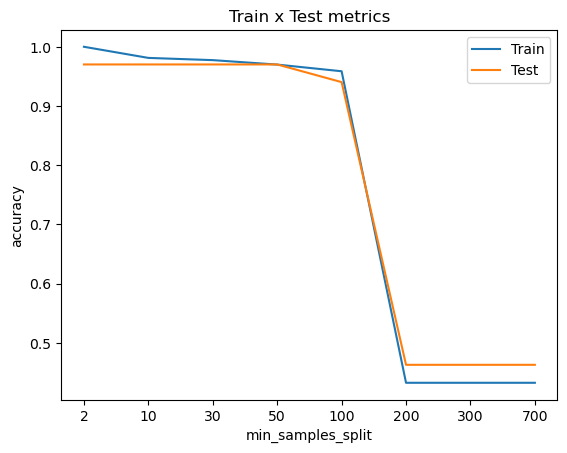

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# min_samples_split 값 리스트
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

# 정확도 저장용 리스트
accuracy_list_train = []
accuracy_list_test = []

# 각 min_samples_split에 대해 모델 훈련
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, y_train)
    
    # 훈련 데이터와 테스트 데이터 예측
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # 정확도 계산
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    
    # 정확도 리스트에 추가
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

# 결과 시각화
plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train, label='Train')
plt.plot(accuracy_list_test, label='Test')
plt.legend()
plt.show()


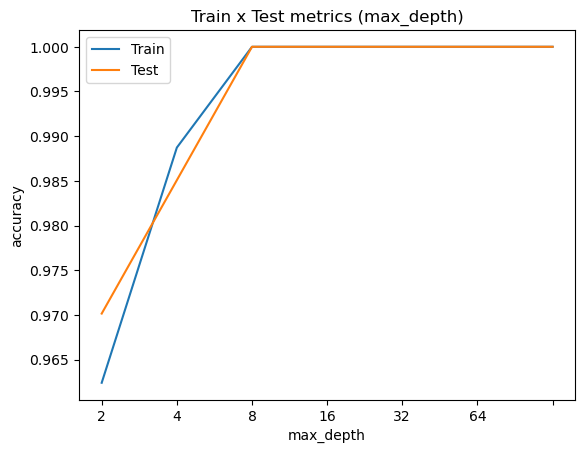

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# max_depth 리스트
max_depth_list = [2, 4, 8, 16, 32, 64, None]

# 정확도 리스트
accuracy_list_train = []
accuracy_list_test = []

# max_depth에 대해 모델 훈련
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # 예측값 계산
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # 정확도 계산
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    
    # 리스트에 추가
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

# 시각화
plt.title('Train x Test metrics (max_depth)')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train, label='Train')
plt.plot(accuracy_list_test, label='Test')
plt.legend()
plt.show()


In [20]:
#테스트 정확도는 tree_length=2 에서 가장 높습니다. 
#허용된 깊이가 더 작거나 크면 트리는(과적합 문제가 있음) 
#최종 트리 모델은 다음과 같다는 것을 볼수 있다.

#max_depth = 8
#min_samples_split = 100

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 50]
}

# 랜덤포레스트 모델 생성
rf = RandomForestClassifier(random_state=42)

# GridSearchCV 적용
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 확인
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# GridSearchCV 적용
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)



Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score:  0.9661076170510132
Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 10, 50],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# GridSearchCV 결과에서 최적의 하이퍼파라미터
best_params = {
    'max_depth': 10,
    'min_samples_split': 2,
    'n_estimators': 50
}

# 최적의 하이퍼파라미터를 사용하여 모델 생성
optimized_rf = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# 모델 학습
optimized_rf.fit(X_train, y_train)

# 테스트 데이터로 성능 평가
y_pred = optimized_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")



Test Accuracy: 1.0000


In [26]:
from sklearn.metrics import classification_report, accuracy_score

# 테스트 데이터로 성능 평가
y_pred = optimized_rf.predict(X_test)

# 정확도 출력
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 분류 보고서 출력
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Test Accuracy: 1.0000

Classification Report:

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



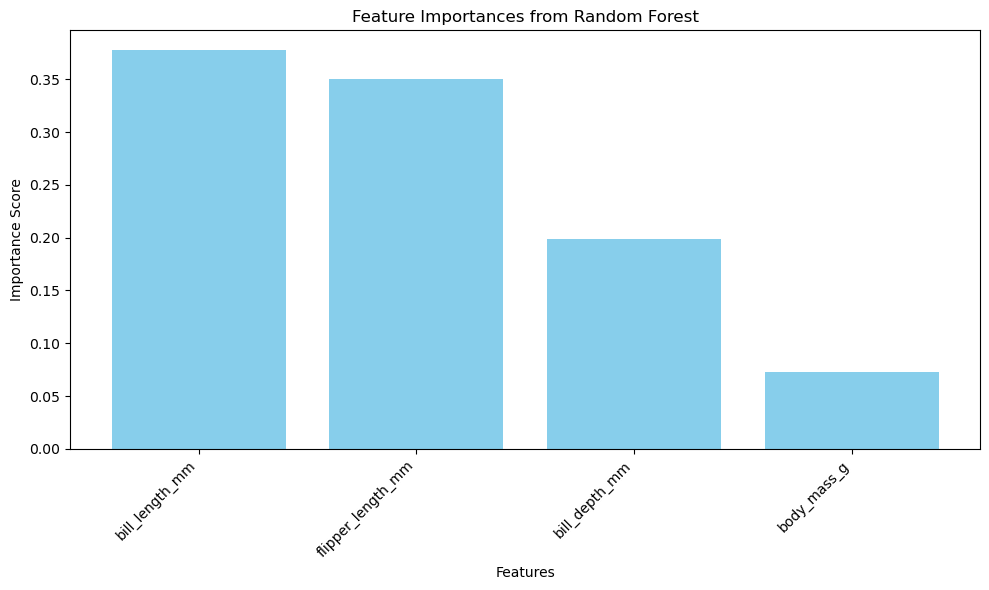

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 특징 중요도 가져오기
feature_importances = optimized_rf.feature_importances_

# 특징 이름 가져오기 (X_train 컬럼 이름 기반)
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# 데이터프레임으로 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
이 결과에서 부리길이와 부리 깊이가 높은 정확도를 보이며, 
모델 성능에 중요한 역할을 한다는 것을 알 수 있습니다. 
반면, 날개 길이,체중은 상대적으로 낮은 정확도를 보이므로,
이 특징이 모델의 예측에 미치는 영향이 적다는 것을 나타냅니다.
이러한 분석을 통해 주요 특징을 파악하고,
향후 모델 개선 및 특징 선택에 유용한 정보를 제공합니다.